# Solution: Stochastic simulations of a novel pathogen

## Part 1: Comparing deterministic and stochastic model output when R<sub>0</sub> = 0.75

For the deterministic model, you should observe that infection goes extinct without causing an epidemic, since R<sub>0</sub> is less than 1. As it is a deterministic model, this output will look the same each time we run this code.

In the stochastic model, however, after performing at least 10 simulations with the same code, you should see that the output of each simulation looks slightly different. Most of the time, infection is not transmitted for long and will quickly die out. However, despite R<sub>0</sub> < 1, small localised epidemics can still occur by chance! However, any such outbreak will eventually go extinct. 

See below for an example output of the stochastic model (of course, your output will not look exactly the same). Notice the simulation shown in red - in this case, the infection persisted for over a month before finally going extinct, despite having R<sub>0</sub> < 1.

[1]  0  1  6  1 17  1 91 62  2  1

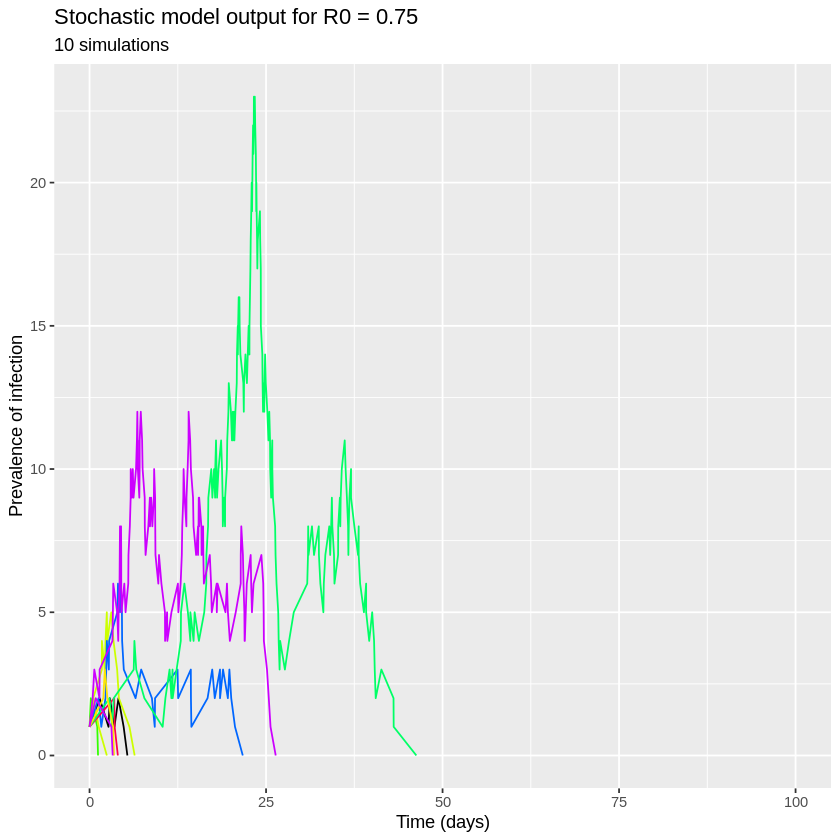

In [1]:
library("GillespieSSA")                                       # load package for stochastic algorithm
library(ggplot2)                                              # load plotting package

# Input from etivity
initial_state_values <- c(S = 1000000,  
                          I = 1,       
                          R = 0,
                          cum_inc = 0)

source("../w9_function.R")                 # loading the function for simulating repeated iterations
set.seed(100)                                                 # we add this line to make sure the 10 simulations
                                                              # look the same every time you run the solutions file
simulate_stoch_model(beta = 0.3, gamma = 0.4, n_sims = 10,    # simulate model 10 times with given beta and gamma
                     plot = "prevalence")

## Part 2: Stochastic simulations with different R<sub>0</sub>

**Simulating the stochastic model 100 times for R<sub>0</sub> = 0.1:**  
Since $\gamma$ is 0.4 per day, $\beta$ = 0.1 * 0.4 = 0.04 per day

  [1] 0 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 4 1 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1


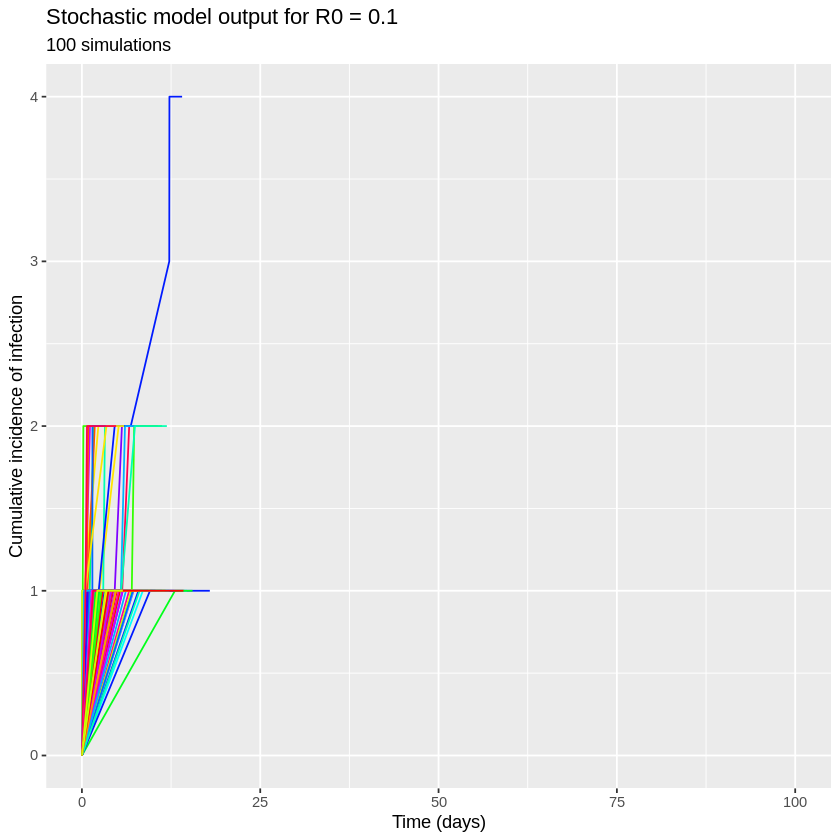

In [2]:
stoch_output1 <- simulate_stoch_model(beta = 0.04, gamma = 0.4, n_sims = 100, plot = "cumulative_incidence")
print(stoch_output1)

###  How often to you get an epidemic?

As you can see from the plot and the cumulative incidence in each iteration, in nearly all iterations the total number of infections does not exceed 2 - no outbreak occurs. 

However, here just as in real life outbreak situations, it is not always obvious how we should define an epidemic. For the purpose of the current exercise, let us set an arbitrary threshold, that at least 10 people need to be infected, before we declare an epidemic. 

In this case, with R<sub>0</sub> = 0.1, out of 100 iterations the number of times an epidemic has occurred is:

In [3]:
length(stoch_output1[stoch_output1>=10])

[1] 0

Of course, with such a low R<sub>0</sub>, it is not surprising that even by chance we do not observe an epidemic. *However*, what if R<sub>0</sub> is still below 1, but very close to it?

**Simulating the stochastic model 100 times for R<sub>0</sub> = 0.9:**  
Since $\gamma$ is 0.4 per day, $\beta$ = 0.9 * 0.4 = 0.36 per day

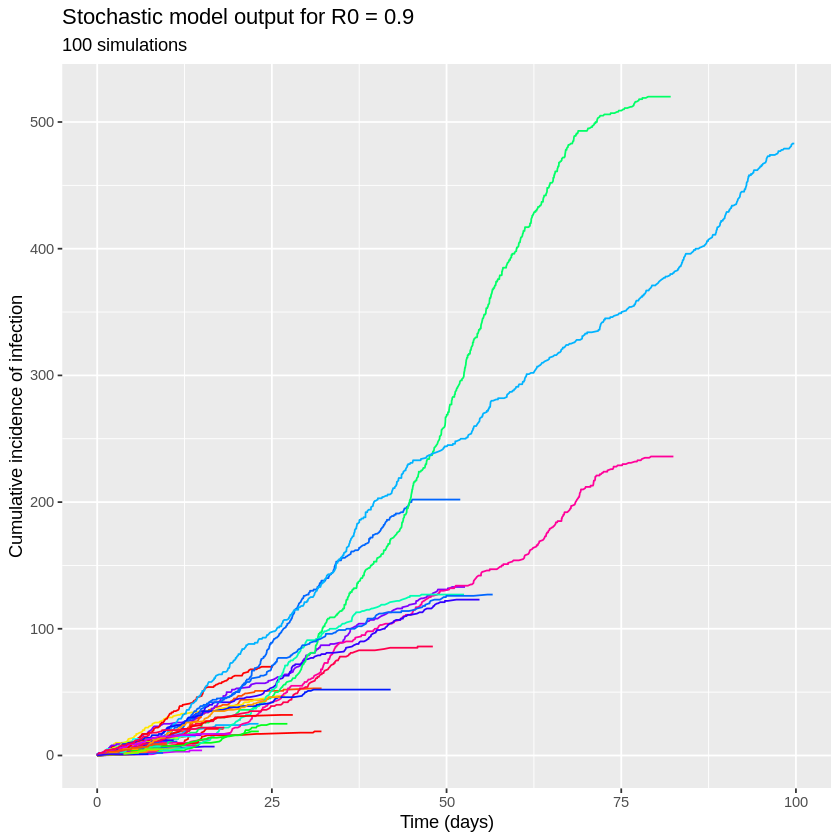

[1]   0   1  10   1   1   7  44   2   9   1   1  10   2   1   1  11   1   3
 [19]   3  47   7   1   4  25   1  53  16   6   2   2   1 133   2  13 236   4
 [37]   2  21   2   2   1  70   6 123   1   4   2   2   3   4   3   1   1 202
 [55]   1   2   1  15   7  10   5   6   1   2   4 520  25   2 127 483  16  12
 [73]   2   8   1 127   7   4   1  14   1   2   1   1  86  19   4  19  32  52
 [91]   3   7  46   1   5  17   9   5  22   1

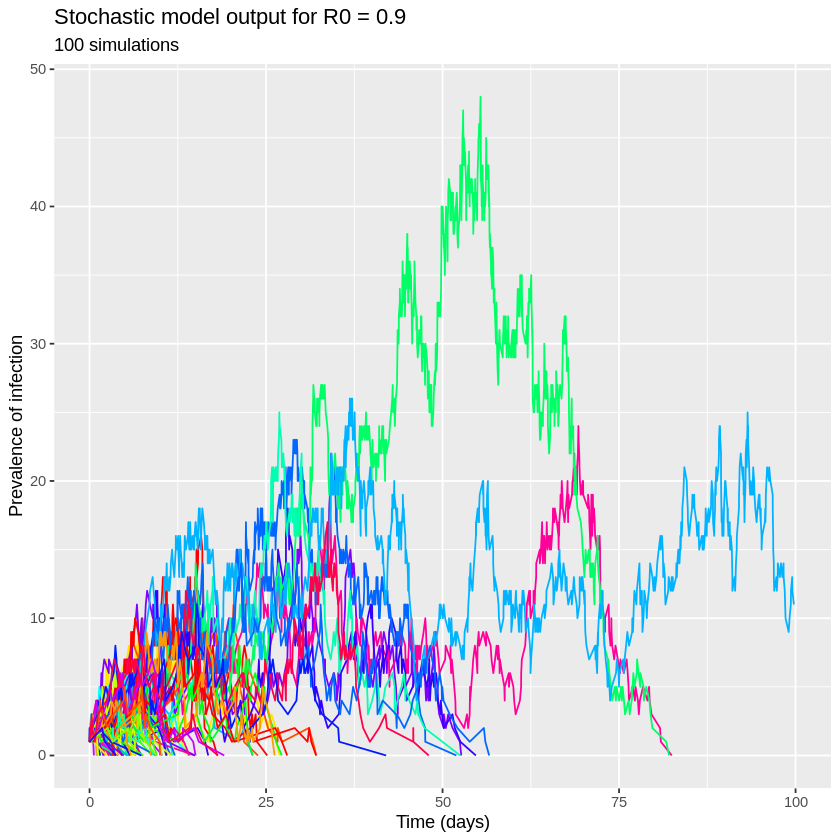

In [4]:
set.seed(11)     # add this line to ensure simulations look the same every time you run the solutions notebook
stoch_output2 <- simulate_stoch_model(beta = 0.36, gamma = 0.4, n_sims = 100, plot = "cumulative_incidence")
set.seed(11)     # add this line to ensure simulations are the same as for incidence plot
simulate_stoch_model(beta = 0.36, gamma = 0.4, n_sims = 100, plot = "prevalence")

###  How often to you get an epidemic?

In [5]:
length(stoch_output2[stoch_output2>=10])

[1] 33

This time, we observe an epidemic (according to our arbitrary definition) in around a quarter to a third of iterations. Keep in mind that had we used a deterministic model, we still would have seen no transmission and hence no outbreak because R<sub>0</sub> < 1. In real life, chance events can play an important role in whether transmission is sustained or not - in the case of introduction of a novel pathogen in a naive population like here, using a stochastic model is therefore essential to capture the role of these chance events.

Also, note that although most simulations give only a few infections (in agreement with a deterministic model), it is in fact possible to get relatively large outbreaks when R<sub>0</sub> is less than, but close to, 1. Notice, for example, the simulation in red, where over 500 people became infected during the epidemic. Additionally, as you can see from the prevalence plot, the epidemic in the turquoise iteration is still ongoing by the end of the simulation period of 100 days.

**Simulating the stochastic model 100 times for R<sub>0</sub> = 1.1:**  
Since $\gamma$ is 0.4 per day, $\beta$ = 1.1 * 0.4 = 0.44 per day

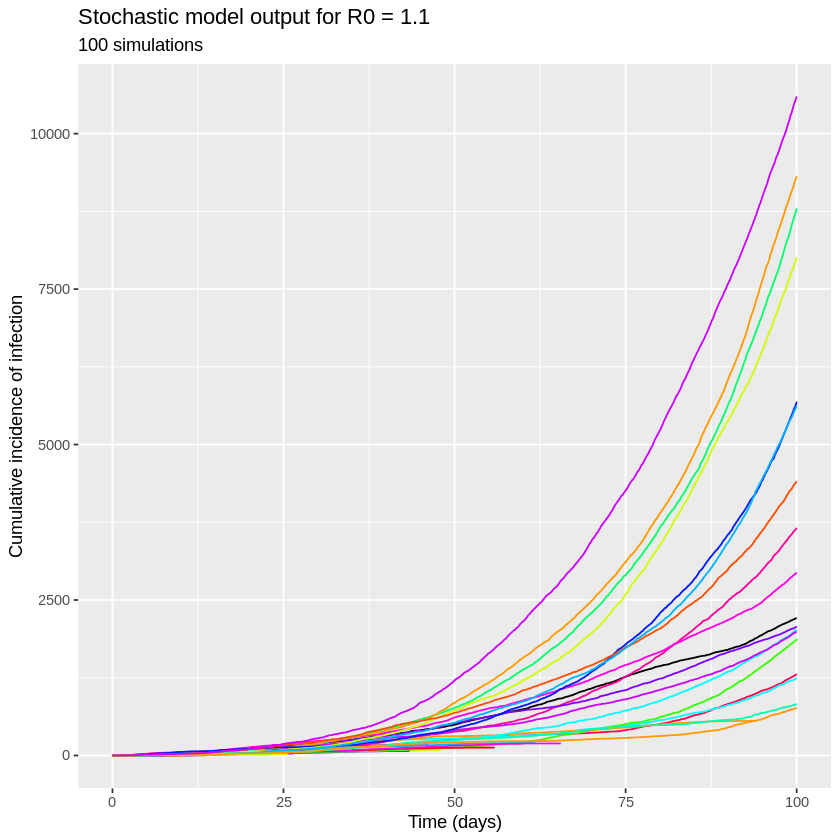

[1]  2213    34     9   114  3656    90    51     1     7     1    75    16
 [13]     2    72     2   167     2     4    32     3     1  1308     5     2
 [25]     4  1243     1     6  2939  1871     3   126     1     1  2074     1
 [37]     6     1     1     2     1     3     1     1     1    11   556    14
 [49]    15     5     6    30     2     2    14     4  8793     1  9312     1
 [61]     3  2014    39     5     1     1     5     4     1     1     2     6
 [73]     1     2    18     1     3   200  1995     2     2   193  5685    10
 [85]     1     9  8003  4407     4    19     3     1     1   827     3  5623
 [97]    21     2   764 10594

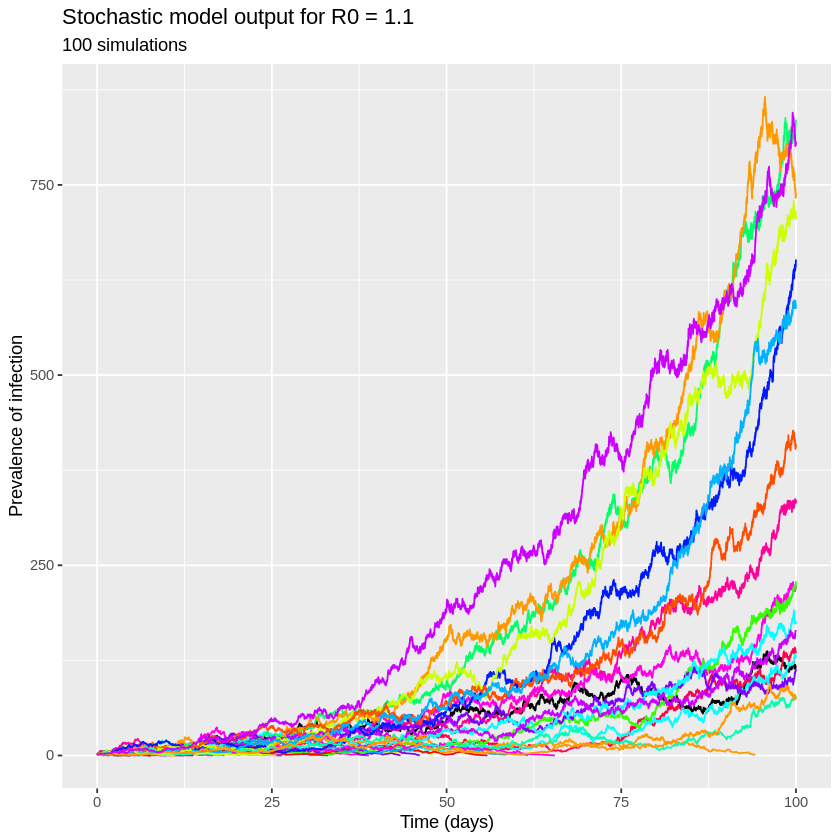

In [6]:
set.seed(11)     # add this line to ensure simulations look the same every time you run the solutions notebook
stoch_output3 <- simulate_stoch_model(beta = 0.44, gamma = 0.4, n_sims = 100, plot = "cumulative_incidence")
set.seed(11)     # add this line to ensure simulations are the same as for incidence plot
simulate_stoch_model(beta = 0.44, gamma = 0.4, n_sims = 100, plot = "prevalence")

Now that we have R<sub>0</sub> > 1, despite only a small increase from 0.9 to 1.1, the graph looks quite different, with some large outbreaks occurring (many of which have not yet reached their peak after 100 days when the plot/simulation ends). 

###  How often to you get an epidemic?

In [7]:
length(stoch_output3[stoch_output3>=10])

[1] 41

You will see that an outbreak now occurs in close to a half of iterations! Even though R<sub>0</sub> is now greater than 1, an outbreak is still far from guaranteed.